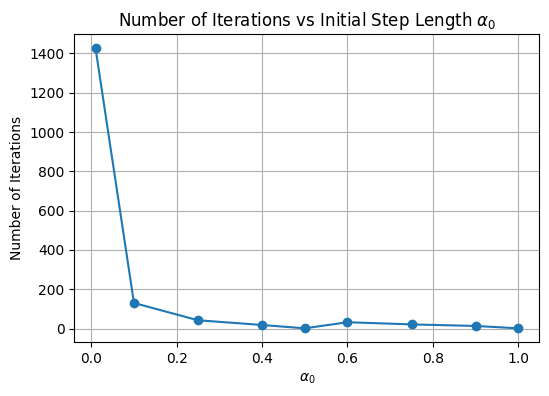

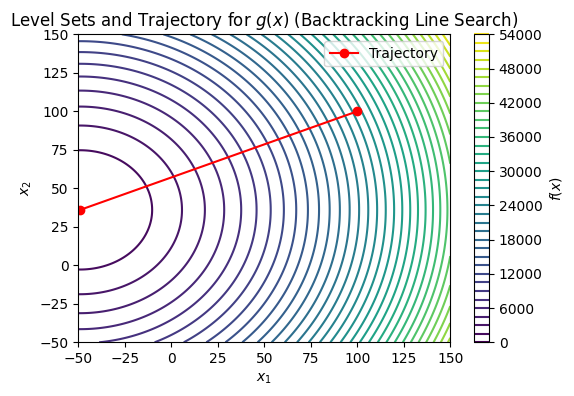

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def backtracking_line_search(f, grad_f, x_k, p_k, alpha_0, rho, gamma):
    """Performs backtracking line search to find step length alpha."""
    alpha = alpha_0
    while f(x_k + alpha * p_k) > f(x_k) + gamma * alpha * np.dot(grad_f(x_k), p_k):
        alpha *= rho
    return alpha

def gradient_descent_with_backtracking(f, grad_f, x0, tol, alpha_0, rho, gamma):
    """Gradient descent algorithm with backtracking line search."""
    x_k = x0
    iterations = 0
    trajectory = [x_k]

    while np.linalg.norm(grad_f(x_k)) > tol:
        p_k = -grad_f(x_k)
        alpha_k = backtracking_line_search(f, grad_f, x_k, p_k, alpha_0, rho, gamma)
        x_k = x_k + alpha_k * p_k
        trajectory.append(x_k)
        iterations += 1

    return x_k, f(x_k), iterations, np.array(trajectory)

def plot_results(trajectory, f, title):
    """Plots level sets of the function and the optimization trajectory."""
    x1 = np.linspace(-50, 150, 200)
    x2 = np.linspace(-50, 150, 200)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.array([f(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

    plt.figure(figsize=(6, 4))
    plt.contour(X1, X2, Z, levels=50, cmap='viridis')
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', label='Trajectory')
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.colorbar(label='$f(x)$')
    plt.show()


f1 = lambda x: 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2
g1 = lambda x: (x[0] + 49)**2 + (x[1] - 36)**2

def grad_f1(x):
    return np.array([
        -1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0]),
        512 * (x[1] - x[0]**2)
    ])

def grad_g1(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])


x0 = np.array([100, 100])
tol = 1e-10
rho = 0.5
gamma = 0.5
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]


results = []

for alpha_0 in alpha_values:
    x_min, f_min, iters, traj = gradient_descent_with_backtracking(g1, grad_g1, x0, tol, alpha_0, rho, gamma)
    results.append((alpha_0, x_min, f_min, iters, traj))


iterations = [res[3] for res in results]
plt.figure(figsize=(6, 4))
plt.plot(alpha_values, iterations, marker='o', linestyle='-')
plt.title('Number of Iterations vs Initial Step Length $\\alpha_0$')
plt.xlabel('$\\alpha_0$')
plt.ylabel('Number of Iterations')
plt.grid()
plt.show()

# Plot level sets and trajectory for a specific alpha_0 (e.g., 0.5)
selected_result = results[4]  # Corresponding to alpha_0 = 0.5
plot_results(selected_result[4], g1, 'Level Sets and Trajectory for $g(x)$ (Backtracking Line Search)')
